<img src="https://5938490.fs1.hubspotusercontent-na1.net/hubfs/5938490/essential-guide-to-ad-fraud-detection-featured-image-2.png" alt="Image Description" width="700" height="300">


# Description:-

This notebook provides a comprehensive approach to **Credit Card Fraud Detection** by applying data preprocessing, visualization, and machine learning techniques.

## Key Steps

### Data Analysis
- Investigates the dataset to understand the class imbalance and identifies fraudulent and valid transactions.
- Uses descriptive statistics to summarize the "Amount" feature for fraudulent and valid transactions.

### Data Visualization
- Heatmaps to analyze feature correlations.
- Boxplots for feature distribution and outlier detection.
- Pie charts to visualize the total amounts for fraud and valid transactions.

### Data Preprocessing
- Removes duplicates and cleans the data.
- Applies **SMOTE** to oversample the minority class (fraudulent transactions).

### Modeling
- Trains multiple machine learning models:
  - **Random Forest Classifier**
  - **Logistic Regression**
  - **XGBoost Classifier**
- Models are tuned with relevant hyperparameters and evaluated on a test set.

### Evaluation Metrics
- Confusion matrices and heatmaps to assess model predictions.
- Key metrics: **accuracy**, **precision**, **recall**, **F1-score**, and **ROC-AUC score**.


# 1. Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
print(df.shape)

(284807, 31)


In [3]:
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df.duplicated().sum()


1081

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
# Determine the number of fraud cases in the dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))

print(f'Outlier Fraction: {outlierFraction}')
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')


Outlier Fraction: 0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


In [10]:
FA = fraud['Amount'].describe()
FA

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
VA = valid['Amount'].describe()
VA

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

# 2. Data Visualization

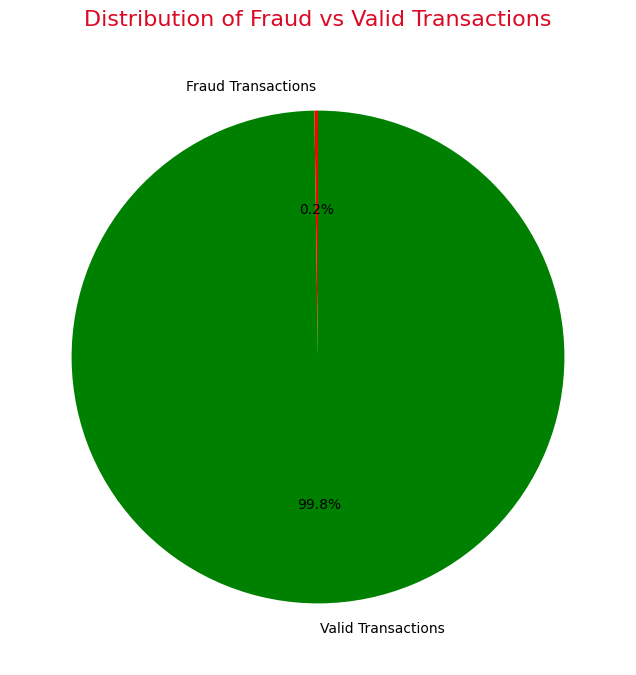

In [12]:
import matplotlib.pyplot as plt

# Calculate the total sum for fraud and valid transactions
fraud_amount = fraud['Amount'].sum()
valid_amount = valid['Amount'].sum()

amount_data = [fraud_amount, valid_amount]
labels = ['Fraud Transactions', 'Valid Transactions']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(amount_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribution of Fraud vs Valid Transactions', fontsize=16,pad = 17,color = '#db0925')
plt.show()

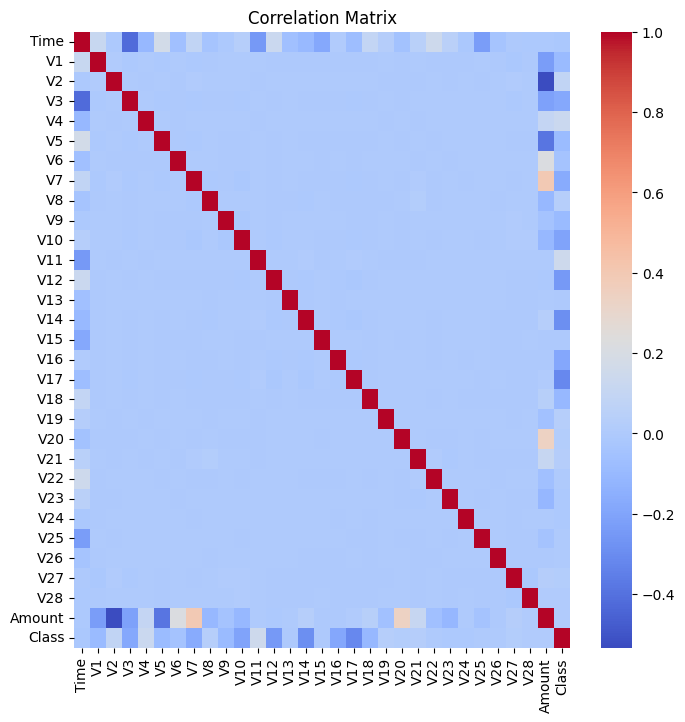

In [13]:

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


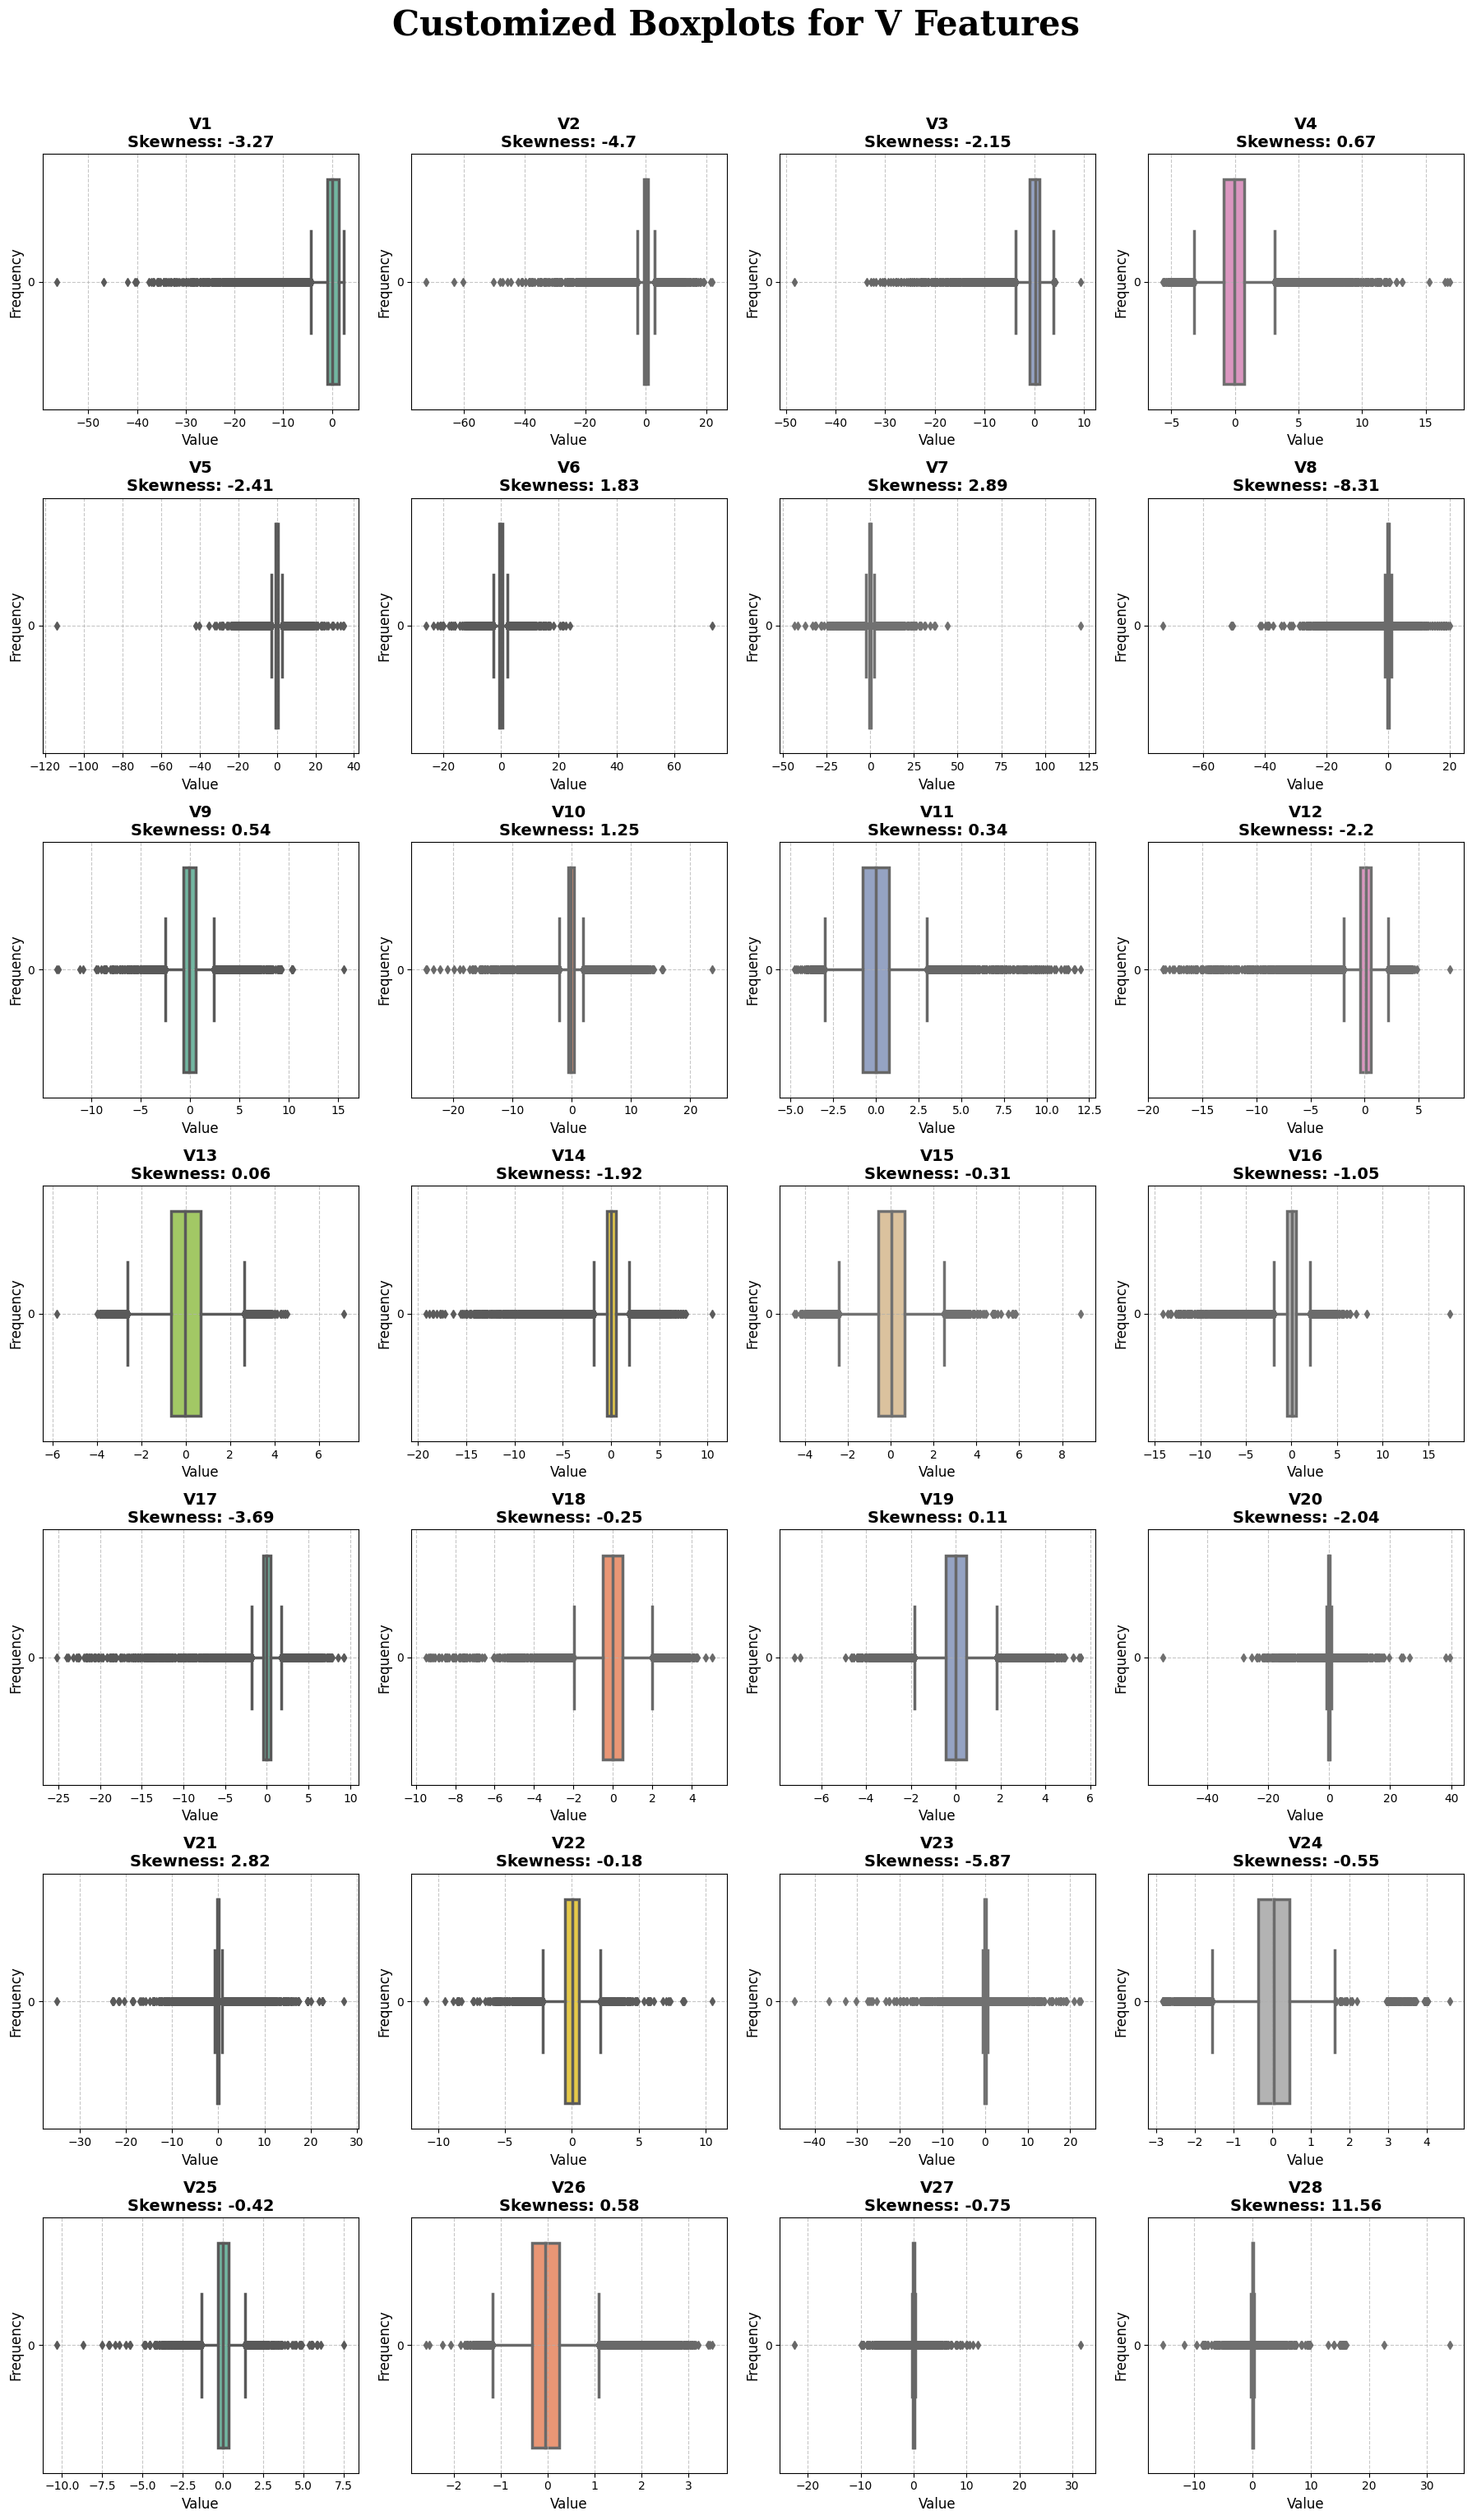

In [14]:

def boxplots_custom(df, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(18, 30))
    fig.suptitle(suptitle, y=1.02, size=30, fontweight='bold', family='serif')
    axs = axs.flatten()

    palette = sns.color_palette("Set2", len(columns_list))

    for i, column in enumerate(columns_list):
        sns.boxplot(data=df[column], orient='h', ax=axs[i], palette=[palette[i]], linewidth=2.5)
        skewness = round(df[column].skew(axis=0, skipna=True), 2)
        axs[i].set_title(f'{column}\nSkewness: {skewness}', fontsize=14, fontweight='bold')
        axs[i].set_xlabel('Value', fontsize=12)
        axs[i].set_ylabel('Frequency', fontsize=12)
        axs[i].grid(True, linestyle='--', alpha=0.7)
        axs[i].tick_params(axis='both', labelsize=10)

    for j in range(len(columns_list), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

v_features = [col for col in df.columns if col.startswith('V')]
boxplots_custom(df=df, columns_list=v_features, rows=7, cols=4, suptitle='Customized Boxplots for V Features')


# 3. Data Preprocessing

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [16]:

X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# 4. Modeling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_res, y_train_res)

y_pred = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))


Logistic Regression Accuracy: 0.9835

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.08      0.87      0.15        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.57     56746
weighted avg       1.00      0.98      0.99     56746

Confusion Matrix:
 [[55728   923]
 [   12    83]]

ROC-AUC Score: 0.9286957353844267


In [18]:
# XGBClassifier

model = xgb.XGBClassifier(
    n_estimators=400, 
    learning_rate=0.05,
    max_depth=5, 
    scale_pos_weight=2, 
    random_state=42
)

model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))


XGBoost Accuracy: 0.9989

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.63      0.80      0.70        95

    accuracy                           1.00     56746
   macro avg       0.81      0.90      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56606    45]
 [   19    76]]

ROC-AUC Score: 0.8996028313710261


In [19]:
# RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_res, y_train_res)

y_pred = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Random Forest Accuracy: 0.9995

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56642     9]
 [   22    73]]
ROC-AUC Score: 0.8841310925899947


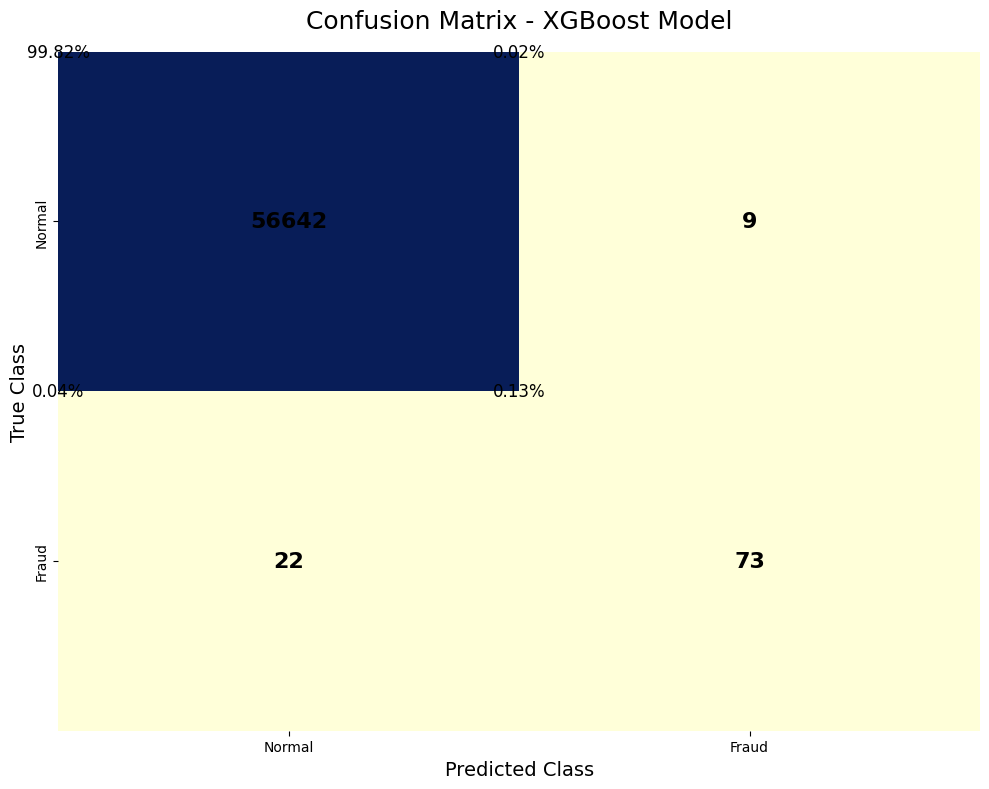

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='YlGnBu', 
            xticklabels=LABELS, 
            yticklabels=LABELS,
            cbar=False, 
            annot_kws={"size": 16, "weight": "bold", "color": "black"})

plt.title('Confusion Matrix - XGBoost Model', fontsize=18, pad = 17)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)

total = conf_matrix.sum()
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, f'{conf_matrix[i, j]/total:.2%}', ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


### Model Performance Summary:

1. **Logistic Regression** 🧑‍💻:  
   - Accuracy: 98.35% ✅  
   - Struggles with fraud detection, with low precision (0.08) for fraud class ⚠️.  
   - Good recall for fraud (0.87) 🔍, but overall performance is skewed due to class imbalance ⚖️.

2. **XGBoost** 🚀:  
   - Accuracy: 99.89% ✅  
   - High recall for fraud (0.80) and precision (0.63) 💪, but still makes some false positives ⚠️.  
   - Strong overall performance with a ROC-AUC score of 0.90 📊.

3. **Random Forest** 🌲:  
   - Accuracy: 99.95% ✅  
   - Balanced performance with good precision (0.89) and recall (0.77) for fraud 🤝.  
   - High accuracy and strong ROC-AUC score (0.88) 📈.

**Conclusion** 🎯: XGBoost and Random Forest perform well overall, with XGBoost slightly outperforming Random Forest in handling fraud cases. Logistic Regression performs well for normal transactions but struggles with fraud detection.
